## Test the fractal dimension function

/home/lars/Git/RandomFracturePatterns/venv/lib/python3.11/site-packages/openpnm/algorithms/_invasion_percolation.py:357: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit


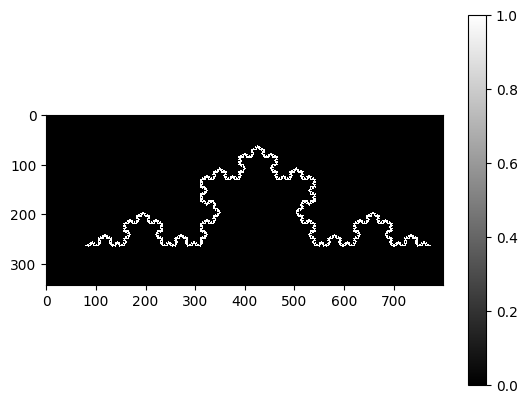

  0%|          | 0/10 [00:00<?, ?it/s]

koch1 with ps: 1.193021525806711
koch1: 1.1924823661667185


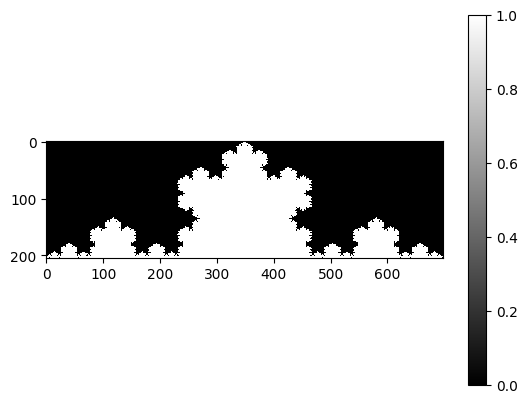

  0%|          | 0/10 [00:00<?, ?it/s]

koch-filled with ps: 1.2386321348674285
koch-filled: 1.2622372719060984


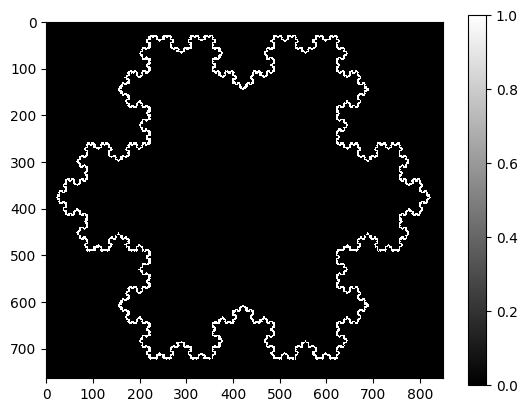

  0%|          | 0/10 [00:00<?, ?it/s]

koch2 with ps: 0.12418096717179307
koch2: 1.347802766659


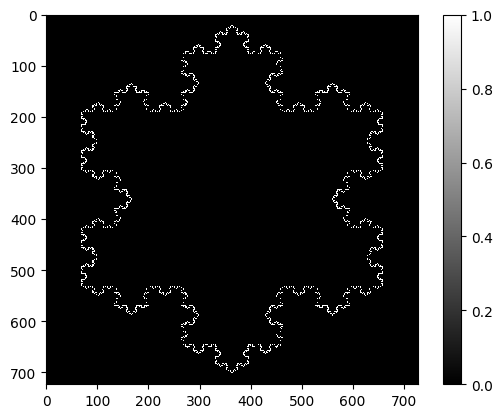

  0%|          | 0/10 [00:00<?, ?it/s]

koch3 with ps: 1.3173659877153145
koch3: 1.2847486914299022


In [1]:
import sys
sys.path.append("../../")

from matplotlib import pyplot as plt
import src.measure.fractal as fractal
import numpy as np

import porespy as ps

# Load picture as greyscale
from PIL import Image

images = {
    "koch1": "koch-flat.png",
    "koch-filled": "koch-flat-filled.png",
    "koch2": "koch.jpeg",
    "koch3": "koch3.jpg",
}
for name, img_path in images.items():
    img = Image.open(img_path)
    img = img.convert('L')
    img = np.array(img)
    img = img / 255 # convert from 0-255 to 0-1

    dim = fractal.fractal_dimension(img, plot=True, threshold=0.5)
    
    ps_dim_data = ps.metrics.boxcount(img)
    coeffs = np.polyfit(np.log(ps_dim_data.size), np.log(ps_dim_data.count), 1)
    ps_dim = -coeffs[0]

    print(f"{name} with ps: {ps_dim}")
    print(f"{name}: {dim}")

In [2]:
# TODO: Plot the fractures and check the results for different iso_values